In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("breast_cancer.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
train = data.iloc[:450,:-1]
test=data.iloc[450:,:-1]
#split into test and train 
#remove last unnamed attribute
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
train1=train.copy()
test1=test.copy()

In [7]:
train1['diagnosis'].replace(to_replace = "M", value =1,inplace=True)
train1['diagnosis'].replace(to_replace = "B", value =0,inplace=True)
train1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
test1['diagnosis'].replace(to_replace = "M", value =1,inplace=True)
test1['diagnosis'].replace(to_replace = "B", value =0,inplace=True)
test1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
450,9111596,0,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,9111805,1,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,9111843,0,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194
453,911201,0,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.13470,0.1478,0.1373,0.10690,0.2606,0.07810
454,911202,0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,...,14.34,22.15,91.62,633.5,0.12250,0.1517,0.1887,0.09851,0.3270,0.07330


In [23]:
from KNN import KNN,LabeledPoint
# from accuracy import accuracy
from metrics import Metrics
from collections import defaultdict
from typing import Dict,Tuple

labeled_points = []
num_correct = 0
total = 0
confusion_matrix_KNN: Dict[Tuple[str,str],int] = defaultdict(int)

for row in train1.values.tolist():
        labeled_points.append(LabeledPoint(row[2:],str(row[1])))

for row in test1.values.tolist():
    predicted = KNN(5,labeled_points,row[2:])
    actual = str(row[1])
    
    if actual == predicted:
        num_correct += 1
        
    total += 1
        
    confusion_matrix_KNN[(predicted,actual)] += 1
        
print(num_correct/total)
print(confusion_matrix_KNN)

0.9411764705882353
defaultdict(<class 'int'>, {('0.0', '0.0'): 86, ('1.0', '1.0'): 26, ('1.0', '0.0'): 6, ('0.0', '1.0'): 1})


In [21]:
from GaussianNB import GaussianNB

num_correct = 0
total = 0
confusion_matrix_NB: Dict[Tuple[str,str],int] = defaultdict(int)

for row in test1.values.tolist():
    predicted = GaussianNB(x_train,y_train,row[2:])
    actual = row[1]
    
    if actual == predicted:
        num_correct += 1
    
    total += 1
    confusion_matrix_NB[(predicted,actual)] += 1
        
print(num_correct/total)
print(confusion_matrix_NB)

0.9243697478991597
defaultdict(<class 'int'>, {(0, 0.0): 85, (1, 1.0): 25, (1, 0.0): 7, (0, 1.0): 2})


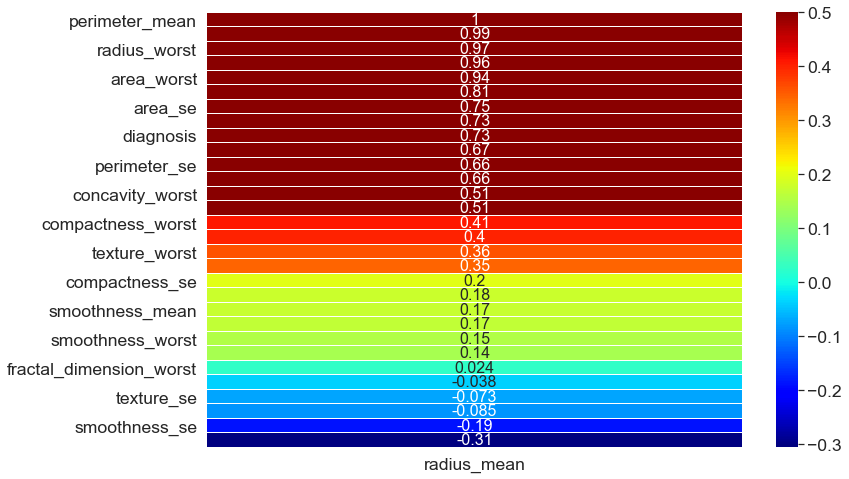

In [39]:
cor = train1.corr().iloc[ : , 1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.savefig("heatMapCancer.png")
plt.show()

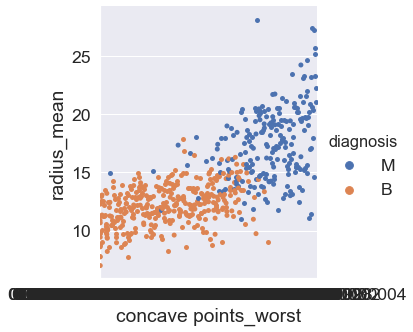

In [24]:
sns.catplot(x="concave points_worst", y="radius_mean", hue="diagnosis", kind="swarm", data= data);
plt.savefig("concaveP_worst_vs_r_mean.png")

In [10]:
train1.drop("id", axis=1, inplace=True)
test1.drop("id", axis=1, inplace=True)

In [11]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                450 non-null    int64  
 1   radius_mean              450 non-null    float64
 2   texture_mean             450 non-null    float64
 3   perimeter_mean           450 non-null    float64
 4   area_mean                450 non-null    float64
 5   smoothness_mean          450 non-null    float64
 6   compactness_mean         450 non-null    float64
 7   concavity_mean           450 non-null    float64
 8   concave points_mean      450 non-null    float64
 9   symmetry_mean            450 non-null    float64
 10  fractal_dimension_mean   450 non-null    float64
 11  radius_se                450 non-null    float64
 12  texture_se               450 non-null    float64
 13  perimeter_se             450 non-null    float64
 14  area_se                  4

In [15]:
x_train=train1.iloc[:,1:]
y_train=train1.iloc[:,0]

In [19]:
x_test=test1.iloc[:,1:]
y_test=test1.iloc[:,0]
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 450 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              119 non-null    float64
 1   texture_mean             119 non-null    float64
 2   perimeter_mean           119 non-null    float64
 3   area_mean                119 non-null    float64
 4   smoothness_mean          119 non-null    float64
 5   compactness_mean         119 non-null    float64
 6   concavity_mean           119 non-null    float64
 7   concave points_mean      119 non-null    float64
 8   symmetry_mean            119 non-null    float64
 9   fractal_dimension_mean   119 non-null    float64
 10  radius_se                119 non-null    float64
 11  texture_se               119 non-null    float64
 12  perimeter_se             119 non-null    float64
 13  area_se                  119 non-null    float64
 14  smoothness_se           

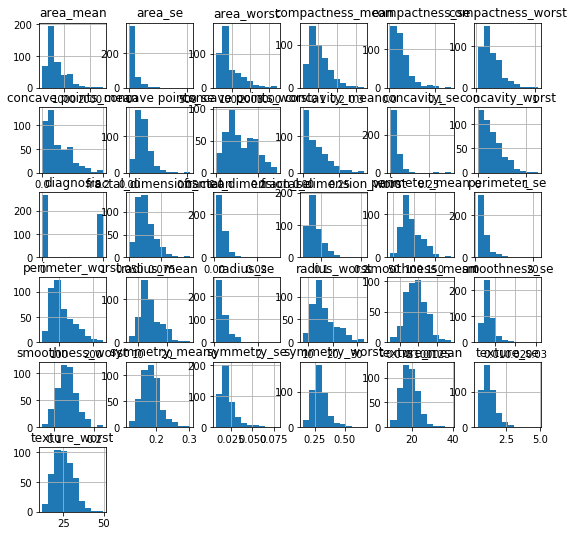

In [25]:
train1.hist(figsize=(9, 9))
plt.savefig('Train_data_Histogram.png', bbox_inches='tight')

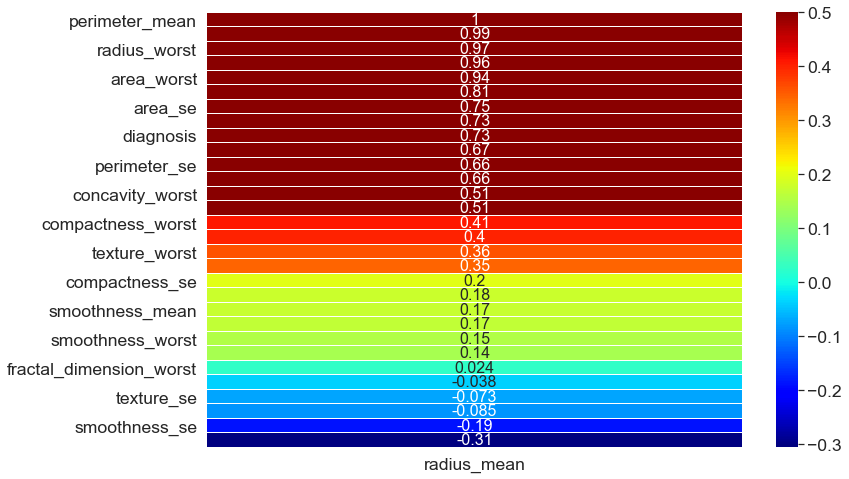

In [29]:
cor = train1.corr().iloc[ : , 1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.savefig("breast_cancer_heatMap.png")
plt.show()

Predicted  0.0  1.0
Actual             
0.0         86    6
1.0          1   26

Accuracy:  0.9411764705882353
Precision: [0.98850575 0.8125    ]
Recall:  [0.93478261 0.96296296]
F1-score:  [0.96089385 0.88135593]


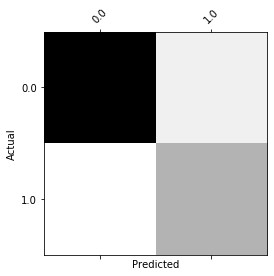

In [13]:
from KNN import KNN,LabeledPoint
from metrics import Metrics

labeled_points = []
y_pred = []
y_actual = []

for row in train1.values.tolist():
        labeled_points.append(LabeledPoint(row[1:],str(row[0])))

for row in test1.values.tolist():
    y_pred.append(KNN(5,labeled_points,row[1:]))
    y_actual.append(str(row[0]))

all_mets = Metrics(y_pred, y_actual)
print(all_mets.confusion_matrix())
all_mets.plot_confusion_matrix()
print('\nAccuracy: ',all_mets.accuracy())
print('Precision:',all_mets.Precision())
print('Recall: ',all_mets.Recall())
print('F1-score: ',all_mets.F1_score())

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Predicted   0   1
Actual           
0.0        85   7
1.0         2  25

Accuracy:  0.9243697478991597
Precision: [0.97701149 0.78125   ]
Recall:  [0.92391304 0.92592593]
F1-score:  [0.94972067 0.84745763]


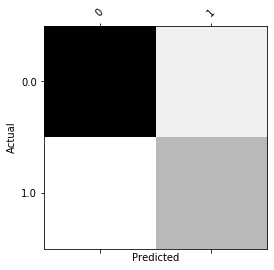

In [16]:
from GaussianNB import GaussianNB
from metrics import Metrics

y_pred = []
y_actual = []

for row in test1.values.tolist():
    y_pred.append(GaussianNB(x_train,y_train,row[1:]))
    y_actual.append(row[0])
    
all_mets = Metrics(y_pred, y_actual)
print(all_mets.confusion_matrix())
all_mets.plot_confusion_matrix()
print('\nAccuracy: ',all_mets.accuracy())
print('Precision:',all_mets.Precision())
print('Recall: ',all_mets.Recall())
print('F1-score: ',all_mets.F1_score())


In [31]:
y_train.shape
yTrain_new=np.array(y_train)
yTrain_new.shape

(450,)

Predicted  False  True 
Actual                 
0             91      1
1              6     21

Accuracy:  0.9411764705882353
Precision: [0.93814433 0.95454545]
Recall:  [0.98913043 0.77777778]
F1-score:  [0.96296296 0.85714286]


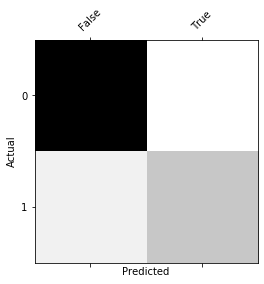

In [38]:
from logisticRegression import LogisticRegression

clf = LogisticRegression(0.0001,4000)
y_train_lr=np.array(y_train)
y_train_lr=y_train_lr.reshape(y_train_lr.shape[0],1)
clf.fit(x_train,y_train_lr)
y_pred = clf.predict(x_test)
y_pred = y_pred >= 0.5
y_actual = np.reshape(np.array(y_test),-1)

all_mets = Metrics(y_pred, y_actual)
print(all_mets.confusion_matrix())
all_mets.plot_confusion_matrix()
print('\nAccuracy: ',all_mets.accuracy())
print('Precision:',all_mets.Precision())
print('Recall: ',all_mets.Recall())
print('F1-score: ',all_mets.F1_score())

In [21]:
from decisionTrees import DecisionTree
from pprint import pprint

clf = DecisionTree(max_depth=15)
x_train_dt = np.array(x_train)
y_train_dt = np.reshape(np.array(y_train),-1)
tree = clf.fit(x_train_dt,y_train_dt)
pprint(tree)

{'cutoff': 106.2,
 'left': {'cutoff': 0.1359,
          'left': {'cutoff': 49.11,
                   'left': {'cutoff': 30.25,
                            'left': {'val': 0},
                            'num_col': 21,
                            'right': {'cutoff': 0.09331,
                                      'left': {'val': 0},
                                      'num_col': 27,
                                      'right': {'cutoff': 0.07529,
                                                'left': {'val': 1},
                                                'num_col': 5,
                                                'right': {'val': 0},
                                                'val': 0.0},
                                      'val': 0.0},
                            'val': 0.0},
                   'num_col': 13,
                   'right': {'cutoff': 0.09387000000000001,
                             'left': {'val': 0},
                             'num_col': 4,
         

Predicted  0.0  1.0
Actual             
0           87    5
1            2   25

Accuracy:  0.9411764705882353
Precision: [0.97752809 0.83333333]
Recall:  [0.94565217 0.92592593]
F1-score:  [0.96132597 0.87719298]


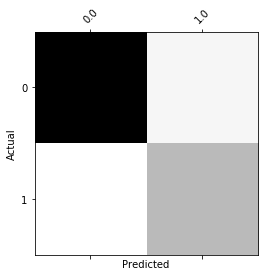

In [23]:
y_pred = clf.predict(np.array(x_test))
y_actual = np.reshape(np.array(y_test),-1)

all_mets = Metrics(y_pred, y_actual)
print(all_mets.confusion_matrix())
all_mets.plot_confusion_matrix()
print('\nAccuracy: ',all_mets.accuracy())
print('Precision:',all_mets.Precision())
print('Recall: ',all_mets.Recall())
print('F1-score: ',all_mets.F1_score())

In [32]:
import importlib
import logisticRegression
importlib.reload(logisticRegression)

<module 'logisticRegression' from 'C:\\Users\\Aditya\\DWDM mini project\\logisticRegression.py'>

In [37]:
importlib.reload(logisticRegression)

<module 'logisticRegression' from 'C:\\Users\\Aditya\\DWDM mini project\\logisticRegression.py'>

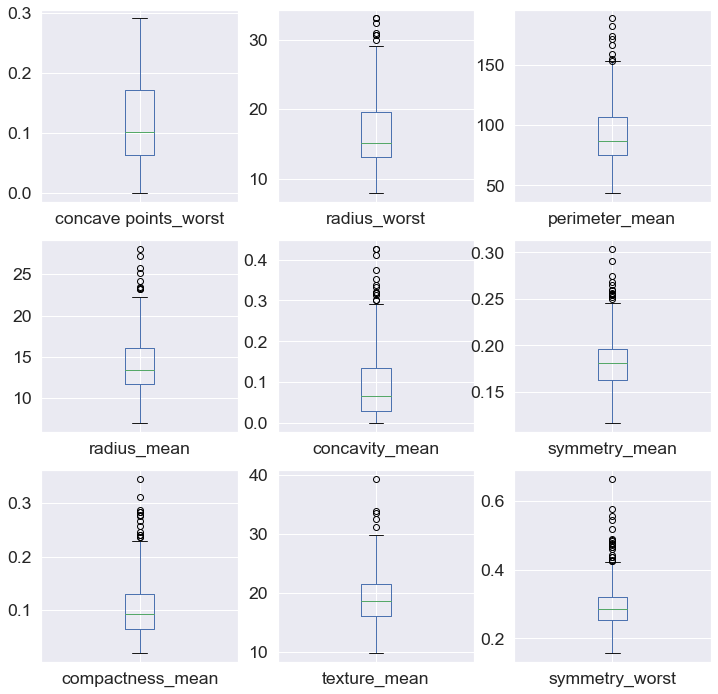

In [43]:
dff=train1[['concave points_worst','radius_worst','perimeter_mean','radius_mean','concavity_mean','symmetry_mean','compactness_mean','texture_mean','symmetry_worst' ]].copy()
# dff.drop("id", axis=1, inplace=True)

# dff=
# sns.boxplot()

dff.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False, figsize = (12, 12));
plt.savefig('BoxplotCancer.png', bbox_inches='tight')